# (Ford Gobike Data Exploration)
## by (Ali Hassan Sobh)

## Investigation Overview

> In this investigation, I wanted to look at bike ride trends on focusing on trip duration .

## Dataset Overview

>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df2 = df[df['member_gender'].isnull() == False]
df2['member_age'] = 2020 - df2['member_birth_year']
df2['member_age'] = df2['member_age'].astype(int)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Trip Durations)


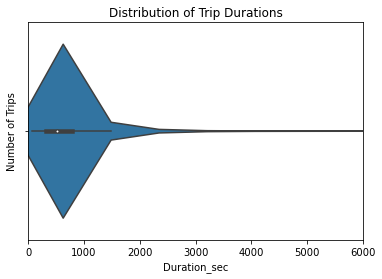

In [4]:
#Show Distribution of Trip Durations
sb.violinplot(data = df2, x = 'duration_sec');
plt.xlim([0, 6000]);
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips');

> it looks like that Trip duration is mostly centered on values which are less than 1000 seconds .

## (Distribution of Start Time Hours )


In [19]:
df2['startTimehr']= df2['start_time'].dt.hour

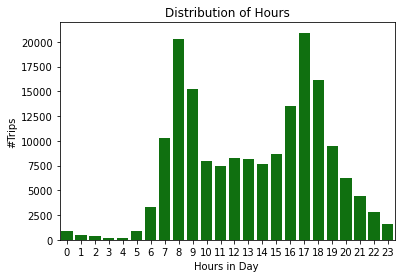

In [29]:
sb.countplot(data = df2, x = 'startTimehr' , color='green');
plt.title('Distribution of Hours')
plt.xlabel('Hours in Day ')
plt.ylabel('#Trips');

> it's looks like most biker start riding from 8 Am and 5 PM in day


## (Distribution of Days of Week )



In [21]:
df2['dayofweekStarted']= df2['start_time'].dt.strftime('%a')

In [22]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df2['dayofweekStarted'] = df2['dayofweekStarted'].astype(ordered_weekdays)

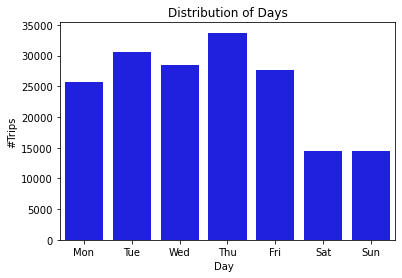

In [23]:
sb.countplot(data = df2, x = 'dayofweekStarted' , color = 'Blue');
plt.title('Distribution of Days')
plt.xlabel('Day  ')
plt.ylabel('#Trips');

> it looks Tuesday and thursday has most bikers in these two days than other days in weeks 

## (Distribution of member gender )

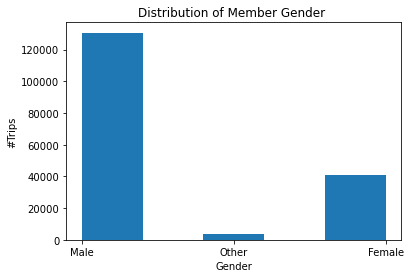

In [24]:
plt.hist(data = df2, x = 'member_gender', bins = 5);
plt.title('Distribution of Member Gender ')
plt.xlabel('Gender')
plt.ylabel('#Trips');

> most Bikers are Males 

## (Relation between age and Trip Duration  )

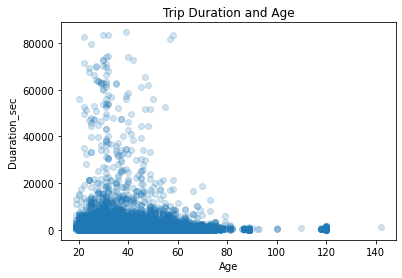

In [25]:
sb.regplot(x = "member_age", y="duration_sec", data=df2, fit_reg = False, scatter_kws={"alpha": 0.2})
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec');

> it looks like ages between 20 and 60 is more to take more time than older people

## (Relation between Day and Trip Duration  )

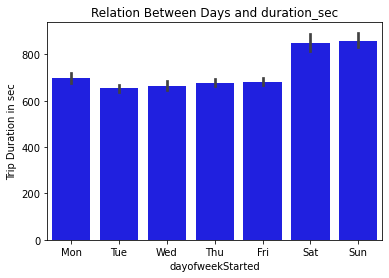

In [26]:
sb.barplot(data=df2, x='dayofweekStarted', y='duration_sec' , color = 'Blue' );
plt.title('Relation Between Days and duration_sec')
plt.xlabel('dayofweekStarted');
plt.ylabel('Trip Duration in sec');

> the sunday and saturday has much higer trips ridding compare to other days

## (Relation between Day and user_type  )

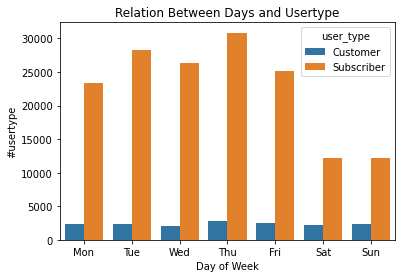

In [27]:
sb.countplot(data=df2, x='dayofweekStarted', hue='user_type');
plt.title('Relation Between Days and Usertype')
plt.xlabel('Day of Week');
plt.ylabel('#usertype');

> it looks like Subscriber has more usage than customer over all 

## (Relation between Trip Duration ,user type, and Age  )

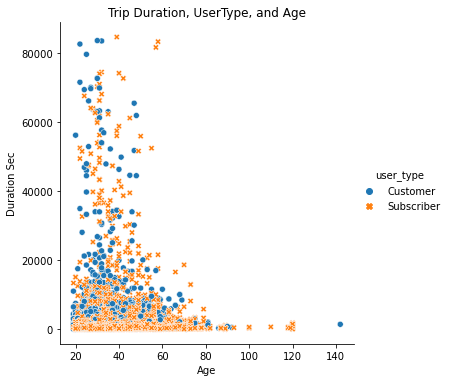

In [28]:
sb.relplot(x ="member_age", y ="duration_sec",
            hue ="user_type", style ="user_type", 
            data = df2);
plt.title('Trip Duration, UserType, and Age');
plt.xlabel('Age');
plt.ylabel('Duration Sec');

>it looks like that both subscriber and customer has the same trend in the age but it's observed that subscribers the trip duration is higher than customer for older age .